# BM 336546 - HW2
# Part 1: Theory Questions

Q1:

To evaluate how well our model performs at T1D classification, we need to have evaluation metrics that measures of its performances/accuracy. Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim.

Q1 solution:

Even though, The most commonly used metric to judge a model is accuracy, It may not be a clear indicator of the performance.
for example, if a random health condition is only found in 0.01% of sample group, a naive estimator (which predicts that no one has that condition) will have a 99.99% accuracy, even tough it obviously does not serve our goal. 
Therefore, we suggest that the more suitable evaluation metric is model performance, which provides important inforamtion, as sensitivity, specificity, PPV, NPV, F1, ROC, AUC etc.
These parametrs would provide more detailed and accurate data to evaluate our model, especially when classes are imbalanced and when it relates to healthcare.  

Q2:

T1D is often associated with other comorbidities such as a heart attack. You are asked to design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant patient features for the algorithm may include blood pressure (BP), body-mass index (BMI), age (A), level of physical activity (P), and income (I). You should choose between two classifiers: the first uses only BP and BMI features and the other one uses all of the features available to you. Explain the pros and cons of each choice.

Q2 solution:

When considering feature selection, there are at least 4 important aspects:
- **Time complexity**:
The more features, the slower the calculations are. When choosing a dataset with many features, Correlated ones will have a negative effect on the loss function which makes it ill-conditioned. Thus, the longer it takes for the loss function algorithm to converge.
In the case of feature selection, the algorithm is more Computational efficient, reducing the complexity of the model will help in reducing the running time.
- **Redundancy**:
In the case of multi features, if there are high correlated features, the data set will become collinear or multicollinear, which means it is not inversible. In that case, the best estimator cannot be calculated using simple linear algebra relation, and more complex algorithm will be used and harder to interpret.
With small feature selection the model becomes simplified. By reducing the chance of correlated features, it is possible to use simple algorithms which simplifies the model and makes it easier to interpret.
- **Generalization**:
For many features, it is harder to generalize. Dataset with Many features will most likely introduce noise into the dataset with too complicated model with high variance. Thus, there is a chance of overfitting, which will give bad result with high performance.
Using feature selection will Generalize better. Less features, thus less noise and the model will most likely to catch the real effects instead of the noise as well.
- **Accuracy**:
Few relevant features are better to train than huge amount of irrelevant and redundant features.
In our problem, it is important to understand how the selected features (BP, BMI) were selected. It seems they have been selected randomly; they may not be the most relevant/ un-correlated features. When using those features alone we might have a model that is too simple to explain the data. From clinical point of view, age and level of physical activity have strong relationship with predicting heart attack. If we exclude those relevant features, the algorithm becomes blind which can affect the prediction accuracy.

In conclusion, feature selection can be very useful in terms of accuracy, time complexity and generalization over using as many features as can be. When the selection is not used wisely, it can lead to over-generalization with high bias, over-simplified model and with small accuracy.
Therefore, in this specific problem with those relevant features we think using all the features available would be better, especially when the number of features is relatively low in both cases.

Q3:
    
A histologist wants to use machine learning to tell the difference between pancreas biopsies that show signs of T1D and those that do not. She has already come up with dozens of measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which model to use. The biopsies are really similar, and it is difficult to distinguish them from the human eye, or by just looking at the features. Which of the following is better: logistic regression, linear SVM or nonlinear SVM? Explain your answer.

Q3 solution:

When considering big number of variables, it is reasonable to assume that the samples will overlap so the data won’t be linearly separable and there might be multicollinearity among the independent variables. 
When dealing with this kind of data, SVM (specifically nonlinear) will most likely perform better than Logistic regression or a linear kernel, because those methods assume linearly separable variables. Risk of overfitting is also small in nonlinear SVM in compare to logistic regression, but while using this method it is important to achieve great number of samples, that will be higher than the number of measurements, because it has great influence on the performance of the method.

Q4:
    
What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning?

Q4 solution:

Generally speaking, the support vector machine (SVM) is a model used for both classification and regression problems though it is mostly used to solve classification problems. The algorithm creates a hyperplane or line (decision boundary) which separates data into classes. It uses the kernel trick to find the best line separator (Decision boundary that has same distance from the boundary point of both classes - maximum margins).

Logistic regression is a classification model which is used to predict the odds in favour of a particular event, that uses logistic (sigmoid) function to find the relationship between variables for classification (The sigmoid function is an S-shaped curve that can take any real-valued number and map it to a value between 0 and 1). 

- SVM tries to finds the “best” margin (distance between the line and the support vectors) that separates the classes and this reduces the risk of error on the data, while logistic regression does not, instead it can have different decision boundaries with different weights that are near the optimal point.

- SVM is based on geometrical properties of the data while logistic regression is based on statistical approaches.
  The risk of overfitting is less in SVM, while Logistic regression is vulnerable to overfitting.
  
Hyper-parameters:

The main hyperparameter of the SVM is the kernel - It maps the observations into some feature space.

When using linear kernel we only have one hyperparameter in SVM: The cost parameter C (1/lambda) - inverse of regularization strength.


There's a difference in the interpetation of C parameter:


in SVM - C controls the trade-off between increasing the distance between the hyperplane and the support vectors, and decreasing the number of samples which are misclassified by this hyperplane.


In LR - C controls the trade-off between allowing the model to increase its complexity by using all the features it can get, and keeping the model as simple as possible.

# Part 2: Coding Assignment


**general notes**:

the main python file is - *hw2_main.py*.  
all needed functions are located in 4 python files:
- *clean_data.py* 
- *visualize_data.py*
- *optimize_models.py*
- *dimension_reduce.py*

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from clean_data import remove_nan, fill_values, fix_values, to_numeric, one_hot_vectors
from visualize_data import table_visualize_test_train, feature_frequency
from optimize_models import LogReg_CrossVal, plot_radar_logReg, C_Support_Vector_Classification,\
                            Random_forest_classifier, compare_classifiers_AUC, features_select_rfc
from dimension_reduce import plt_2d_pca, PCA_trans

Q1: 

Load the data. Explain any preprocessing.

In [2]:
# load data
file = Path.cwd().joinpath('HW2_data.csv')
T1D_data = pd.read_csv(file, thousands=',')
# exchange 'Yes,'Positive, 'No','Negative to numeric data (1,0)
T1D_data_numeric = to_numeric(T1D_data)
# extract features names
T1D_features_names = pd.DataFrame(T1D_data_numeric.columns)[0]

_preprocessing explenation_:

 As a first step, after reviewing the csv file, we changed all *string* type of data ('Yes','Positive, 'No','Negative') to numeric data.
 
 working with binary data is more convinient and easy afterwards.

In [3]:
T1D_data_clean, Diagnosis = fix_values(T1D_data_numeric, flag='fv')

_preprocessing explenation_:

Afterwards, we fixed nan values by writing _fix values_ function.

it enables to choose between `rn` - remove nan and`fv` - filling values:
- `rn` : removes rows contain Nan value in one of the fetures (removing patient data)
- `fv` : fill values (randomize) instead the Nan by the probabily distribution (Binominal) of the column (feature)

Q2:

Perform a test-train split of 20% test.

In [4]:
# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(T1D_data_clean, np.ravel(Diagnosis), test_size=0.2,
                                                    random_state=0, stratify=np.ravel(Diagnosis))

Q3: Provide a detailed visualization and exploration of the data.
You should at least include:


- a. An analysis to show that the distribution of the features is similar between test and train.


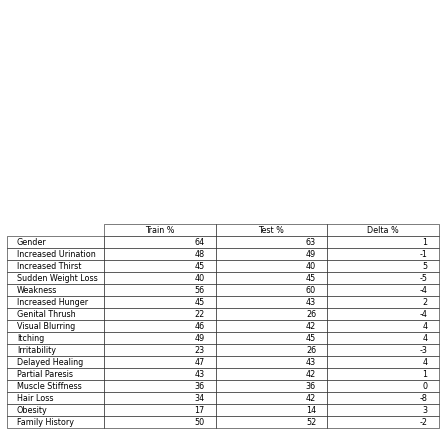

In [5]:
    class_feature = 'Diagnosis'
    table_visualize_test_train(T1D_features_names, X_train, X_test, class_feature)

  - a
       - i. What issues could an imbalance of features between train and test cause?
    
       - ii. How could you solve the issue? 


Q3.
- a solution:

    - i. The issues can cause an imbalance between the features of train and test, this imbalance can result in an inaccurate evaluation. If the model is mostly based on a specific feature result that is not represented in the test set - the statistical analysis will be inaccurate. For example, if we see that there is a large difference in the delta column for _Hair loss_ that is mostly represented in the training set then the statistical analysis might be wrong showing worse results. Meaning that the problem lies in the initial phase of splitting the data into train-test and not the machine learning model.
    - ii. We can solve this issue by looking at the table above and analizing the _Delta_ column. If we see a large number at a specific feature, we should stratify our _train_test_split_ function using the diagnostic and the feature. This is a method that ensures our data's distribution is preserved and applied for each split.


   
- b. Plots to show the relationship between feature and label. 


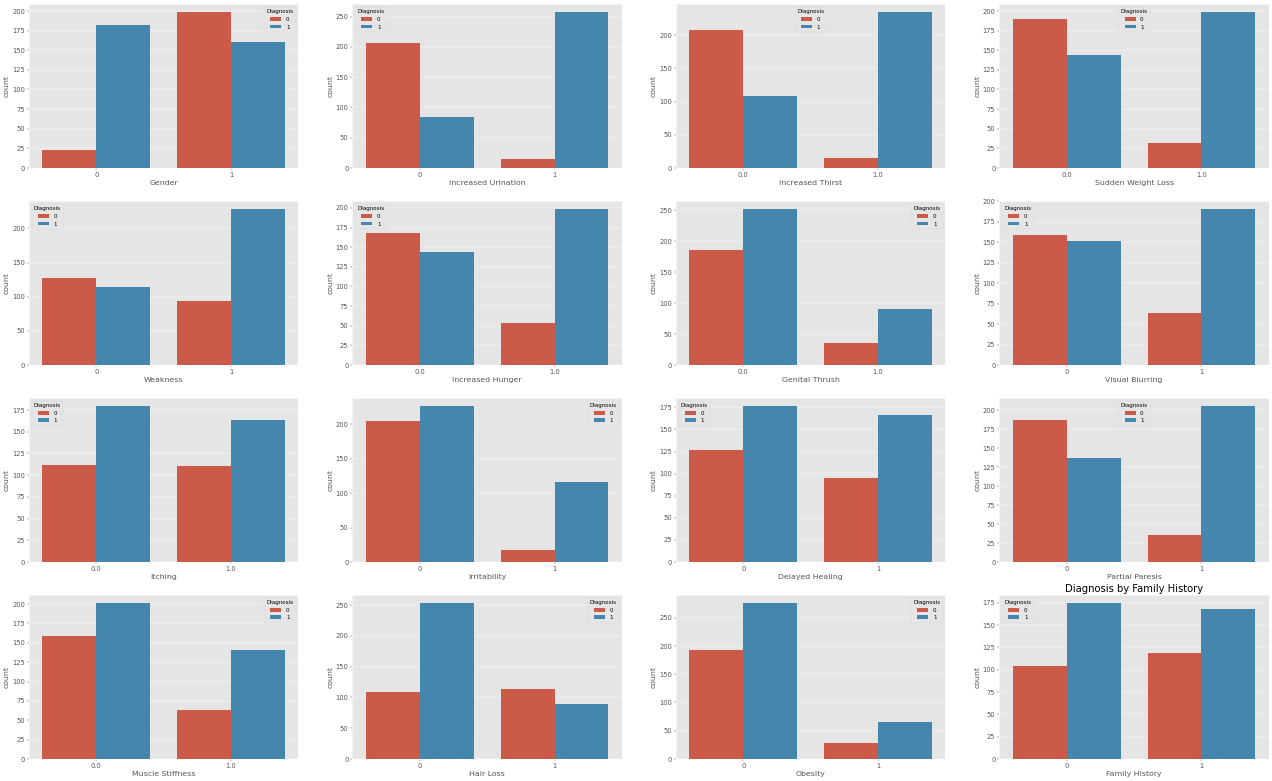

In [6]:
plt.rcParams['figure.dpi'] = 40

T1D_data_clean_full = pd.concat([T1D_data_clean, Diagnosis], axis=1)

fig, axes = plt.subplots(4, 4, figsize=(40, 25))
i = 0
j = 0
for idx, feat in enumerate(T1D_data_clean):
    if feat == 'Age':
        continue
    i, j, axes = feature_frequency(T1D_data_clean_full, feat, class_feature, i, j, axes)
plt.show()

- c. Additional plots that make sense given the mostly binary nature of this dataset. 


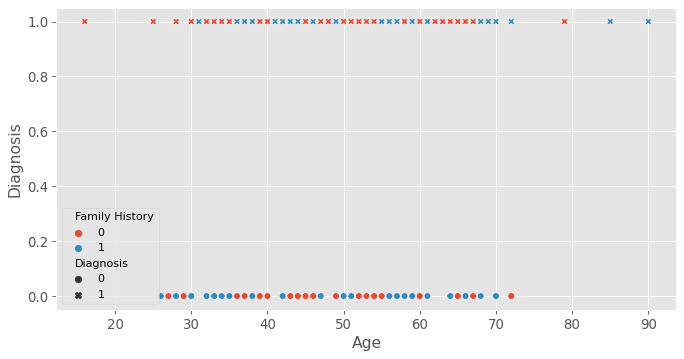

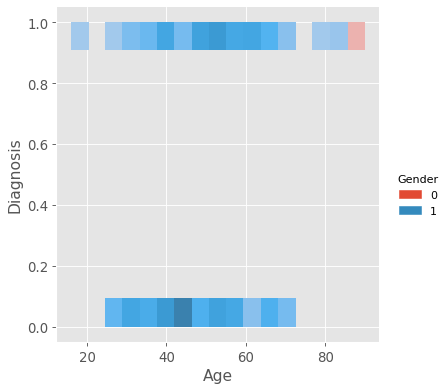

In [7]:
# age, Family History, diagnosis
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 80
sns.scatterplot(data=T1D_data_clean_full, x='Age', y='Diagnosis', hue='Family History', style='Diagnosis')
plt.show()
# age, gender, diagnosis
plt.rcParams['figure.figsize'] = [5, 5]
sns.displot(data=T1D_data_clean_full, x='Age', y='Diagnosis', hue='Gender')
plt.show()

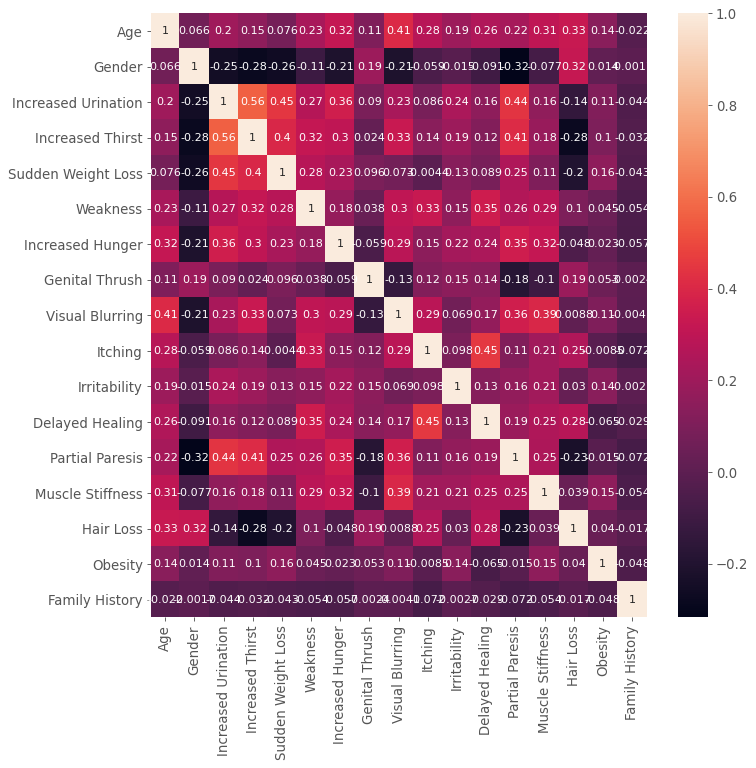

In [8]:
# Correlation Matrix
corr = T1D_data_clean.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()

- d. State any insights you have
    - i. Was there anything unexpected?
    - ii. Are there any features that you feel will be particularly important to your model? Explain why

- Q3.d solution:
    - i.
        At the beginning of the assignment, we read a short explanation about T1D saying that TID is mostly found in children and adolescence: "The disease typically presents in early childhood or adolescence." Therefore, after visualizing the data (Age diagnose family history plot), we expected the age feature would be very significant. We did not see the expected correlation between T1D and patient's age.
    - ii. Interesting insights:

        The first thing that we looked at after presenting the data was to look at the relationship between features and labels with the _feature_frequency_ function. we saw that there is a big difference between the diagnose column for a few specific features like _Increased thirst_, _Increased urination_ and gender. Thus, we assume that these 3 features will be important for our model. Furthermore, we say that there is no feature that has a big Delta between the positive _Train_ and _Test_ columns.  In the additional plots we could not point on any specific insight.

        For example:
            Less important feature:
        - Hair loss:
      approximately 50% of patients who experiencd hair loss were diagnosed with T1D, while about 70% of patients who didn't experianced it, were diagnosed as well
        - Weakness:
      Approximately 70% of patients who experiencd weakness were diagnosed with T1D, while about 50% of patients who didn't experianced it, were diagnosed as well
        More important feature:
        - Thirst:
      Approximately 90% of patients who experiencd thirst were diagnosed with T1D, while about 33% of patients who didn't experianced it, were diagnosed as well.
      same results with increased urination.
        - Gender:
      Approximately 85% of women were diagnosed with T1D, while about 20% of men were diagnosed as well.


Q4:

Encode all your data as one hot vectors.

In [9]:
#encoding data as one hot vectors (0,1)
T1D_data_oneHotVecs = one_hot_vectors(T1D_data_clean)

Q5: Choose, build and optimize Machine Learning Models:

- a. Use 5k cross fold validation and tune the models to achieve the highest test AUC:

    - i. Train one or more linear model on your training set
    
    - ii. Train one or more non-linear models on your training set
- b. Report the appropriate evaluation metrics of the train and test sets (AUC, F1, LOSS, ACC).

Note:
according to the last tutorial there is no need to calculate the loss.
We calculated the log loss of the log regression model.


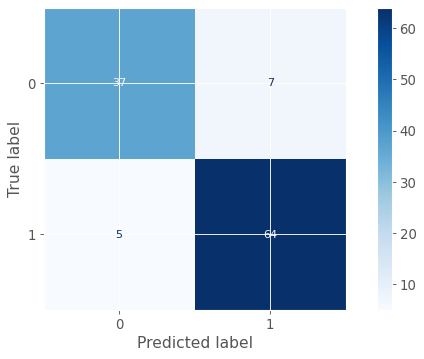

log_reg :
Sensitivity is 0.93 
Specificity is 0.84 
PPV is 0.90 
NPV is 0.88 
Accuracy is 0.89 
F1 is 0.91 
AUROC is 0.962
log loss is:  0.2351229388520905
with params:  {'logistic__C': 1.0, 'logistic__penalty': 'l2'}


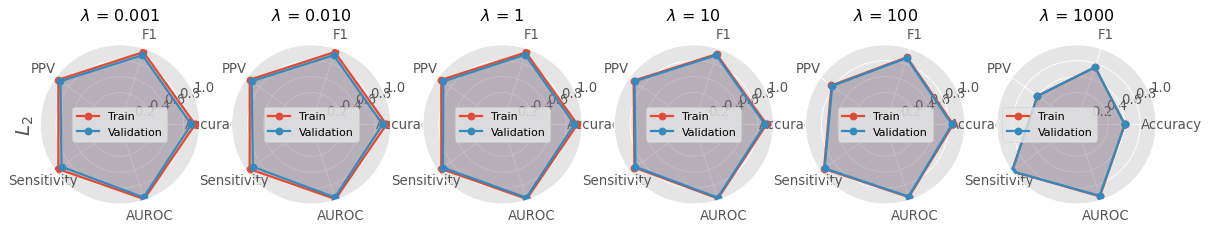

In [10]:
# a 5K cross fold validation for tune so -> AUC highest test

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 80

X_train, X_test, y_train, y_test = train_test_split(T1D_data_oneHotVecs, np.ravel(Diagnosis), test_size=0.2,
                                                    random_state=0, stratify=np.ravel(Diagnosis))
n_splits = 5

# logistic regression model
pen = 'l2'  # 'none'
lmbda = np.array([0.001, 0.01, 1, 10, 100, 1000])
chosen_clf, clf = LogReg_CrossVal(n_splits, pen, lmbda, X_train, X_test, y_train, y_test)

clf_type = 'log_reg'
plot_radar_logReg(clf, lmbda, clf_type)

Pipeline(steps=[('svm', SVC(kernel='linear', probability=True))])


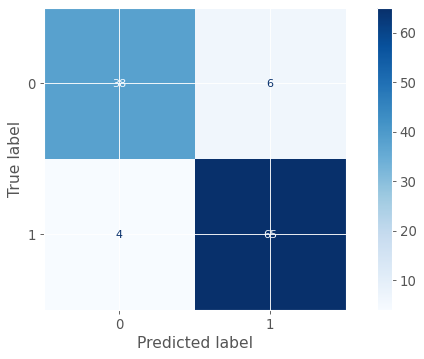

linear :
Sensitivity is 0.94 
Specificity is 0.86 
PPV is 0.92 
NPV is 0.90 
Accuracy is 0.91 
F1 is 0.93 
AUROC is 0.954
C Support Vector Classification -> Done


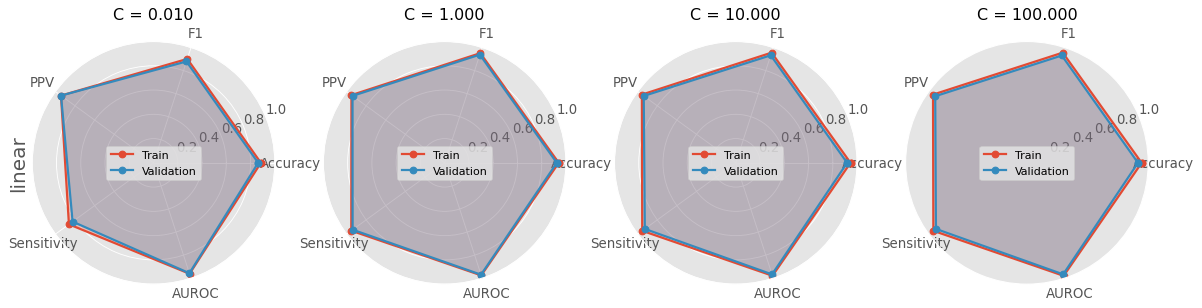

In [11]:
# C_Support_Vector_Classification:
# linear SVM
best_svm_lin = C_Support_Vector_Classification(X_train, X_test, y_train, y_test, n_splits=5, Classifier='linear')

Pipeline(steps=[('svm', SVC(probability=True))])


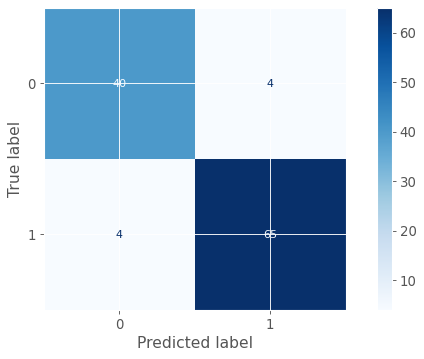

rbf :
Sensitivity is 0.94 
Specificity is 0.91 
PPV is 0.94 
NPV is 0.91 
Accuracy is 0.93 
F1 is 0.94 
AUROC is 0.987
C Support Vector Classification -> Done


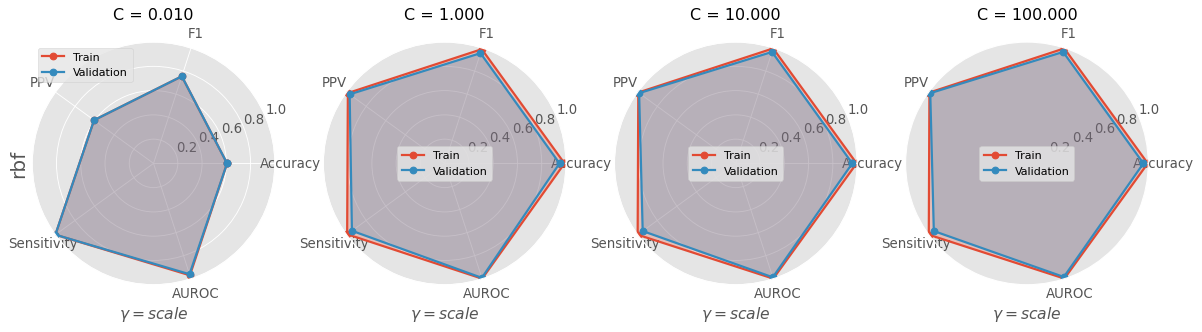

In [12]:
# non-linear SVM
best_svm_non_lin = C_Support_Vector_Classification(X_train, X_test, y_train, y_test, n_splits=5, Classifier='rbf')
# possible to define kernel as 'poly'. We are presenting the _rbf_ classifier because it shows better results and is faster.

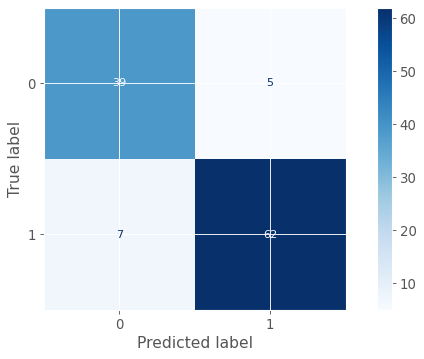

rfc :
Sensitivity is 0.90 
Specificity is 0.89 
PPV is 0.93 
NPV is 0.85 
Accuracy is 0.89 
F1 is 0.91 
AUROC is 0.972


In [13]:
# random forest
rfc = Random_forest_classifier(X_train, X_test, y_train, y_test)

- c. What performs best on this dataset? Linear or non-linear models?

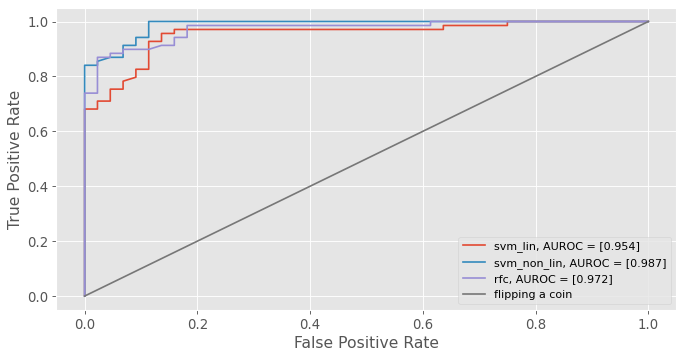

In [14]:
# comparison of classifiers
classifiers = [best_svm_lin, best_svm_non_lin, rfc]
classifiers_str = ['svm_lin', 'svm_non_lin', 'rfc']
classifiers_str = [s + ', AUROC = ' for s in classifiers_str]
compare_classifiers_AUC(classifiers, classifiers_str, X_test, y_test)

As we can see - the best models are the **non-linear** models!

Q6: Feature Selection

- a. As seen previously, a Random Forest Network can be used to explore feature importance. Train a Random Forest on your data.

   - i. What are the 2 most important features according to the random forest.


Features sorted by their score:
[(0.3024, 'Increased Urination'), (0.2063, 'Increased Thirst'), (0.1076, 'Gender'), (0.0802, 'Partial Paresis'), (0.0478, 'Sudden Weight Loss'), (0.0343, 'Increased Hunger'), (0.0304, 'Visual Blurring'), (0.0287, 'Irritability'), (0.0281, 'Hair Loss'), (0.0211, 'Itching'), (0.0197, 'Genital Thrush'), (0.0195, 'Weakness'), (0.0185, 'Delayed Healing'), (0.013, 'Muscle Stiffness'), (0.0096, '70'), (0.009, 'Obesity'), (0.009, '40'), (0.0058, '50'), (0.0022, '60'), (0.0018, '90'), (0.0018, '30'), (0.0014, 'Family History'), (0.0014, '20'), (0.0002, '80'), (0.0002, '10')]


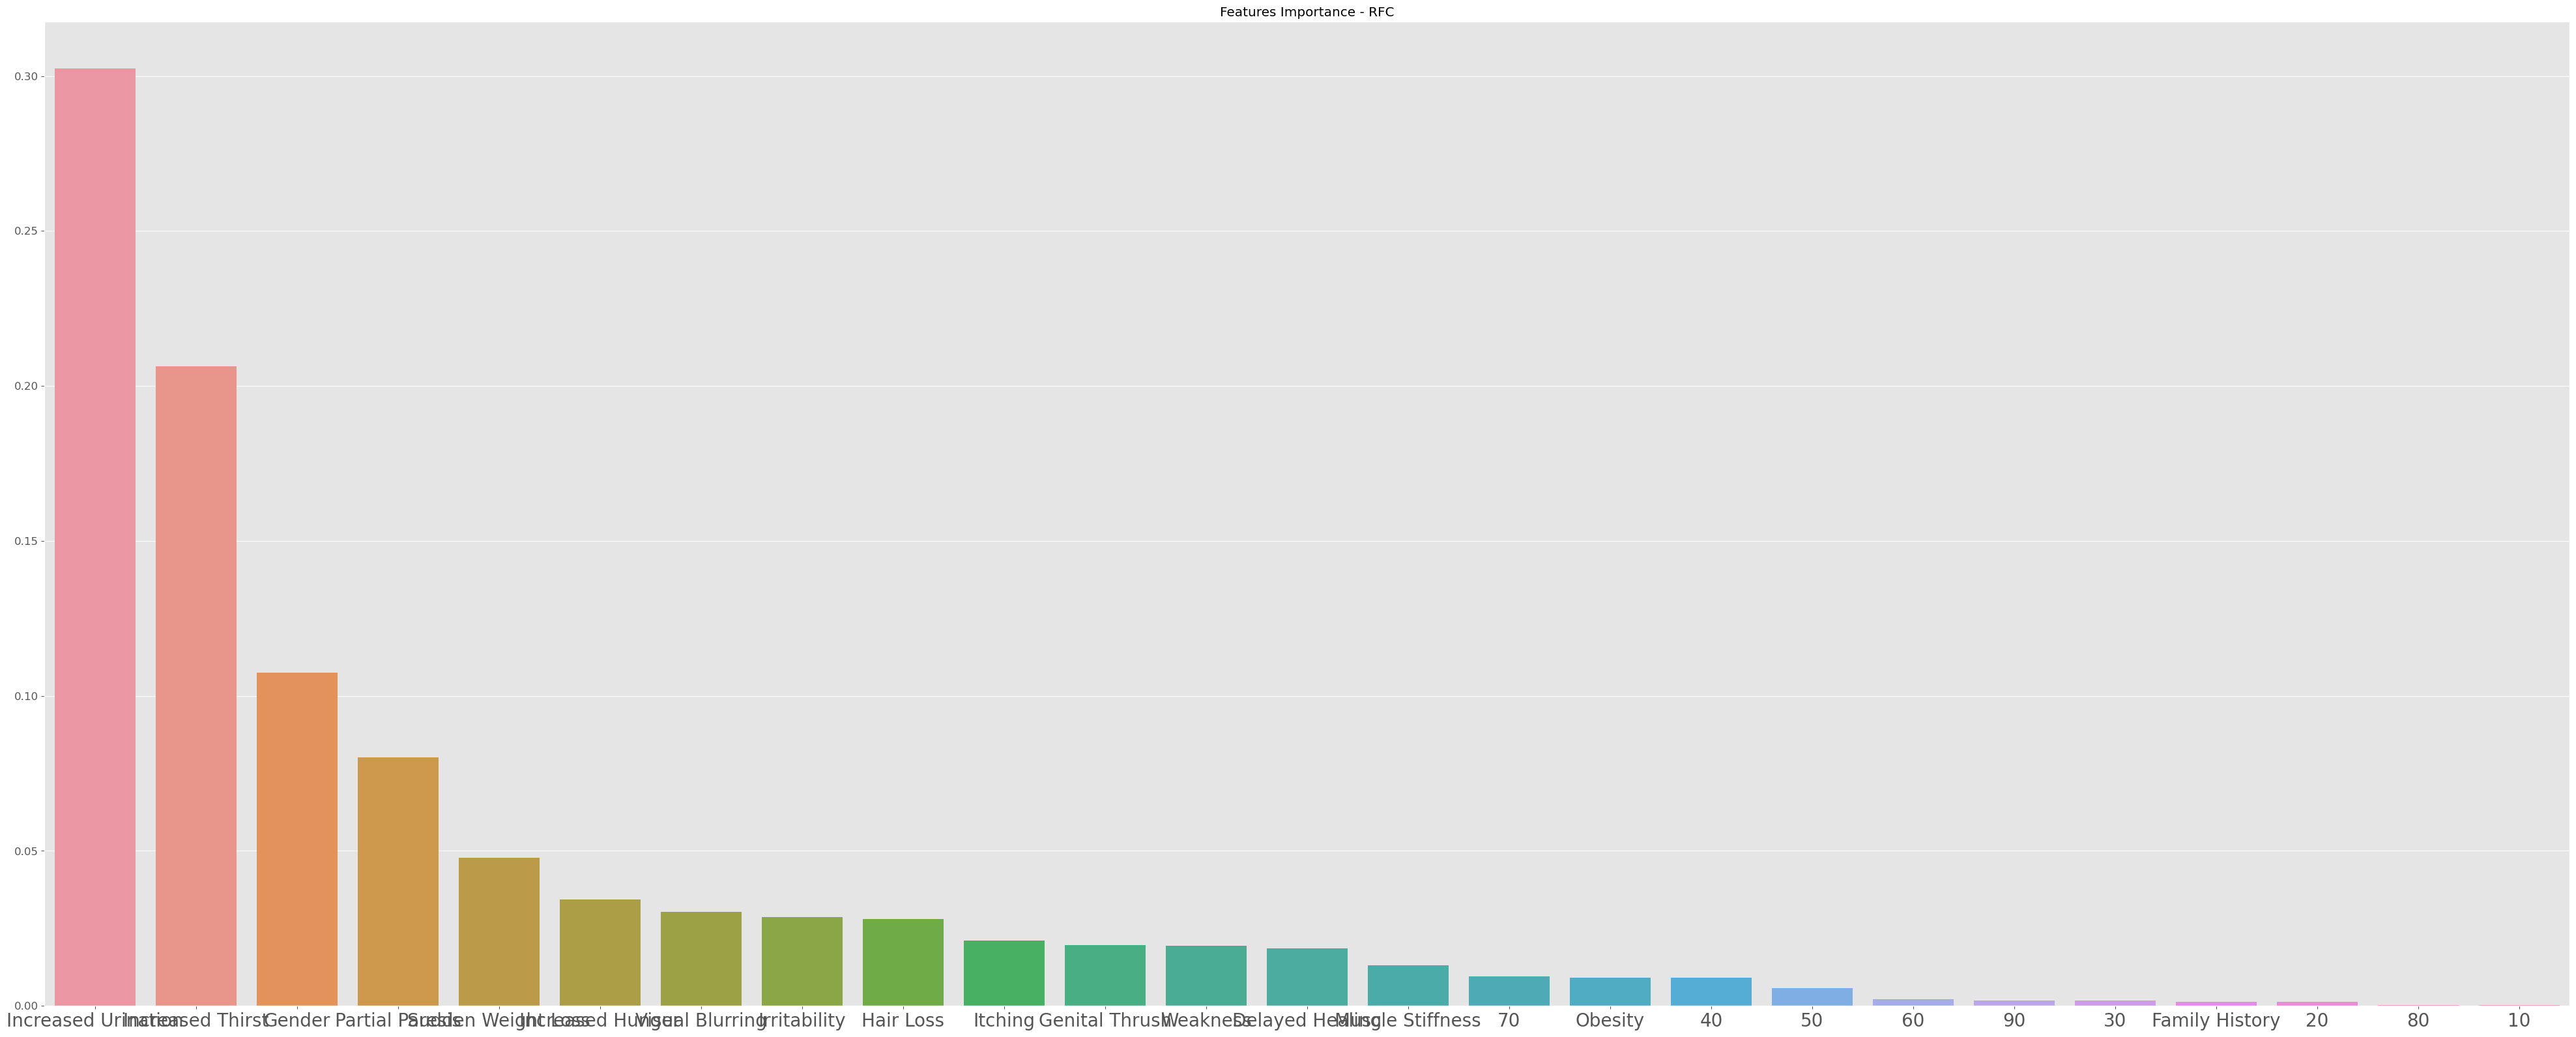

best 2 features by rfc are:  Increased Urination  and  Increased Thirst


In [15]:
plt.rcParams['figure.figsize'] = [50, 20]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['xtick.labelsize'] = 20
# features selection
names = pd.DataFrame(T1D_data_oneHotVecs.columns)[0]
features_select_rfc(rfc, names)

       - ii. Does this match up exactly with the feature exploration you did?

Solution:

    Yes! this matches with the data exploration, We can see that the increased thirst and urination are the most important and that the age is less significant as expected. =]

Q7: Data Separability Visualization

- a. Perform dimensionality reduction on the dataset so that you can plot your data in a 2d plot (show samples with positive and negative labels in different colors).


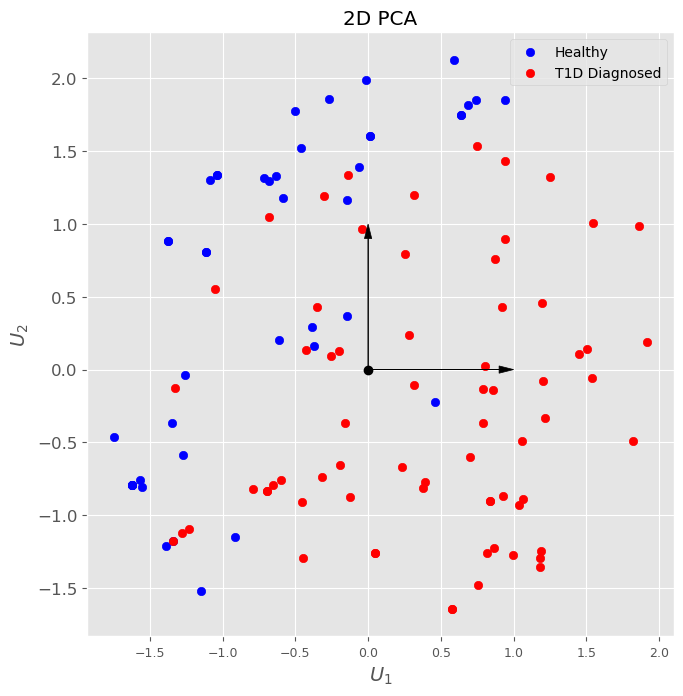

In [16]:
    # a. dimensionality reduction on the dataset so that you can plot your data in a 2d plot
    X_train_pca, X_test_pca = PCA_trans(T1D_data_oneHotVecs, X_train, X_test, y_test, scale_flag=True)
    plt_2d_pca(X_test_pca[:, 0:2], y_test)

- b. How separable is your data when reduced to just two features?

Solution:

    When looking at the data we can see that the data is mostly separable but we couldn't use an linear SVM and expect perfect results.

- c. Train the same models above on the dimensionality-reduced training set.

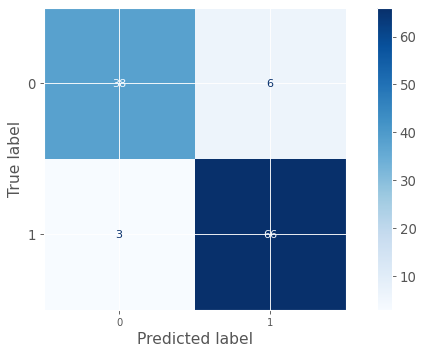

log_reg :
Sensitivity is 0.96 
Specificity is 0.86 
PPV is 0.92 
NPV is 0.93 
Accuracy is 0.92 
F1 is 0.94 
AUROC is 0.961
log loss is:  0.229975489383102
with params:  {'logistic__C': 1.0, 'logistic__penalty': 'l2'}


In [17]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 80
chosen_clf_pca, clf_pca = LogReg_CrossVal(n_splits, pen, lmbda, X_train_pca, X_test_pca, y_train, y_test)

Pipeline(steps=[('svm', SVC(C=100.0, kernel='linear', probability=True))])


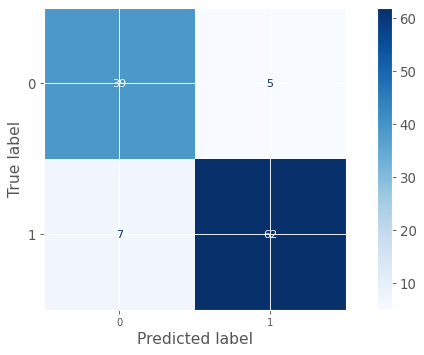

linear :
Sensitivity is 0.90 
Specificity is 0.89 
PPV is 0.93 
NPV is 0.85 
Accuracy is 0.89 
F1 is 0.91 
AUROC is 0.952
C Support Vector Classification -> Done


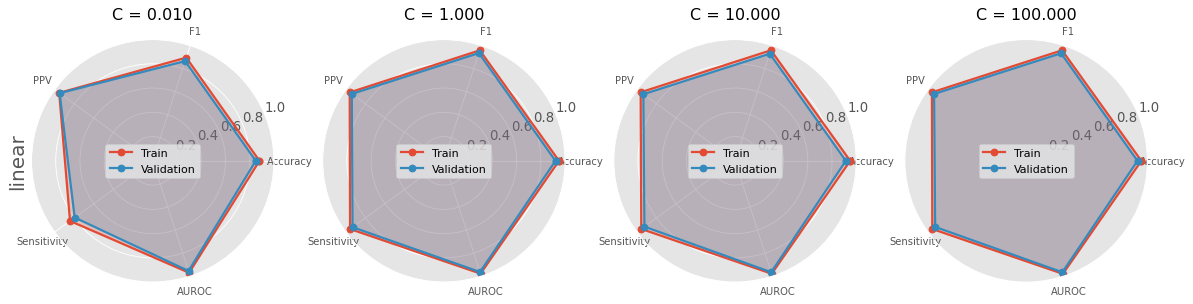

In [18]:
best_svm_lin_pca = C_Support_Vector_Classification(X_train_pca, X_test_pca, y_train, y_test, n_splits=5, Classifier='linear')

Pipeline(steps=[('svm', SVC(probability=True))])


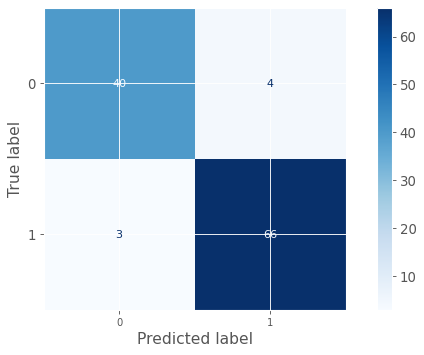

rbf :
Sensitivity is 0.96 
Specificity is 0.91 
PPV is 0.94 
NPV is 0.93 
Accuracy is 0.94 
F1 is 0.95 
AUROC is 0.993
C Support Vector Classification -> Done


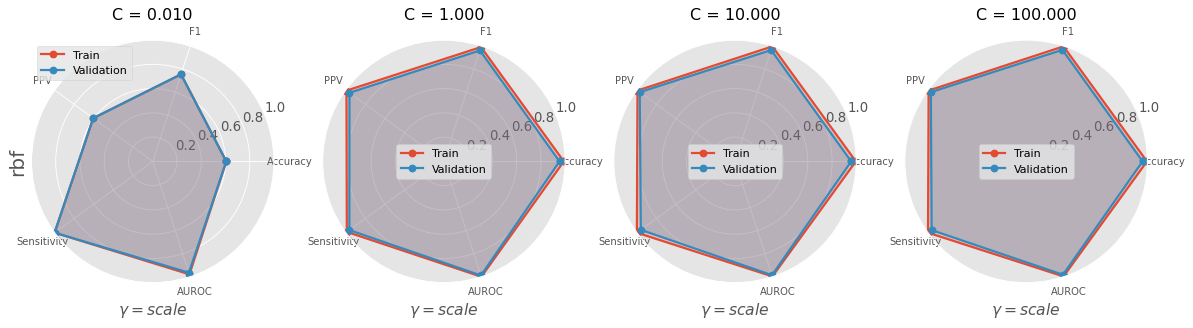

In [19]:
best_svm_non_lin_pca = C_Support_Vector_Classification(X_train_pca, X_test_pca, y_train, y_test, n_splits=5, Classifier='rbf')

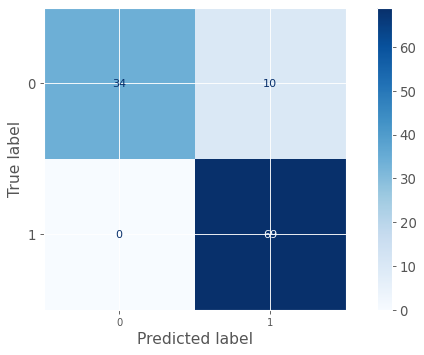

rfc :
Sensitivity is 1.00 
Specificity is 0.77 
PPV is 0.87 
NPV is 1.00 
Accuracy is 0.91 
F1 is 0.93 
AUROC is 0.991


In [20]:
rfc_pca = Random_forest_classifier(X_train_pca, X_test_pca, y_train, y_test)

comparison of classifiers:

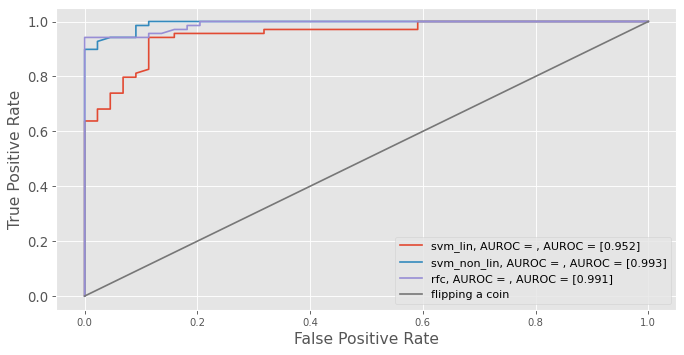

In [21]:
classifiers_pca = [best_svm_lin_pca, best_svm_non_lin_pca, rfc_pca]
classifiers_pca_str = ['svm_lin_pca', 'svm_non_lin_pca', 'rfc_pca']
classifiers_pca_str = [s + ', AUROC = ' for s in classifiers_str]
compare_classifiers_AUC(classifiers_pca, classifiers_pca_str, X_test_pca, y_test)

- d. Train the same models on the best two features from section 6.

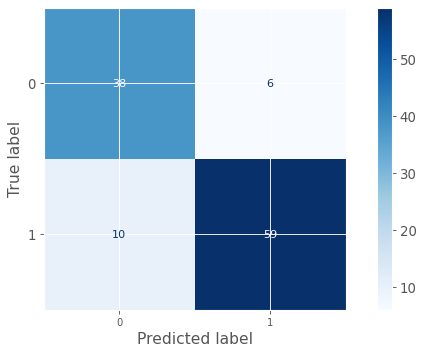

log_reg :
Sensitivity is 0.86 
Specificity is 0.86 
PPV is 0.91 
NPV is 0.79 
Accuracy is 0.86 
F1 is 0.88 
AUROC is 0.894
log loss is:  0.5425207605529547
with params:  {'logistic__C': 0.01, 'logistic__penalty': 'l2'}


In [22]:
# Increased Urination  and  Increased Thirst
X_train_2_feat = pd.concat([X_train['Increased Urination'], X_train['Increased Thirst']], axis=1)
X_test_2_feat = pd.concat([X_test['Increased Urination'], X_test['Increased Thirst']], axis=1)

chosen_clf_2feat, clf_2feat = LogReg_CrossVal(n_splits, pen, lmbda, X_train_2_feat, X_test_2_feat, y_train, y_test)

Pipeline(steps=[('svm', SVC(C=0.01, kernel='linear', probability=True))])


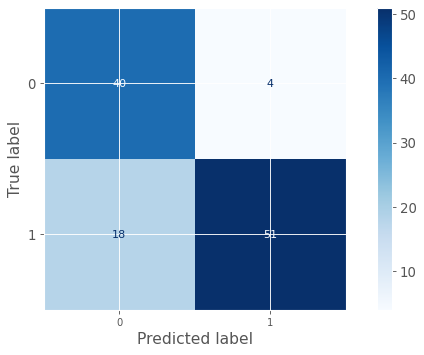

linear :
Sensitivity is 0.74 
Specificity is 0.91 
PPV is 0.93 
NPV is 0.69 
Accuracy is 0.81 
F1 is 0.82 
AUROC is 0.894
C Support Vector Classification -> Done


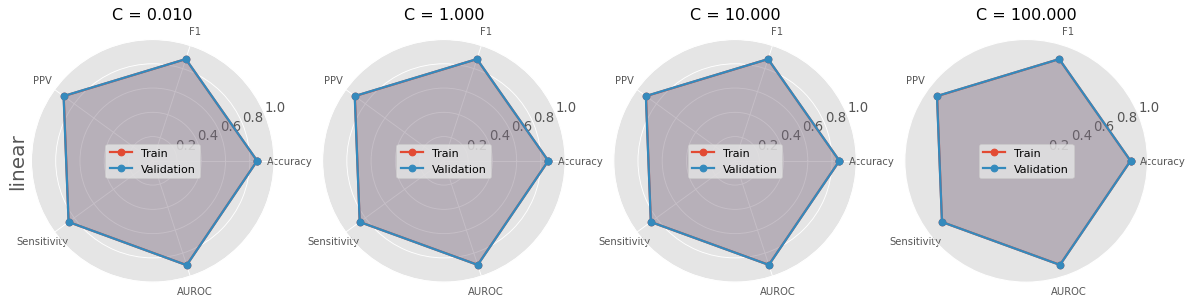

In [23]:
best_svm_lin_2feat = C_Support_Vector_Classification(X_train_2_feat, X_test_2_feat, y_train, y_test, n_splits=5, 
                                                     Classifier='linear')

Pipeline(steps=[('svm', SVC(C=0.01, gamma='auto', probability=True))])


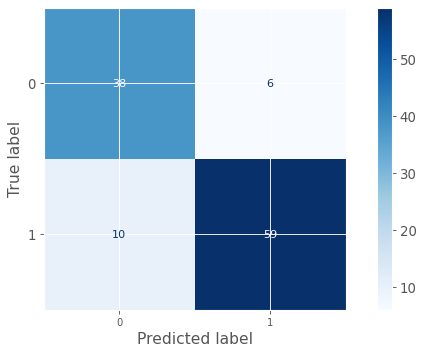

rbf :
Sensitivity is 0.86 
Specificity is 0.86 
PPV is 0.91 
NPV is 0.79 
Accuracy is 0.86 
F1 is 0.88 
AUROC is 0.894
C Support Vector Classification -> Done


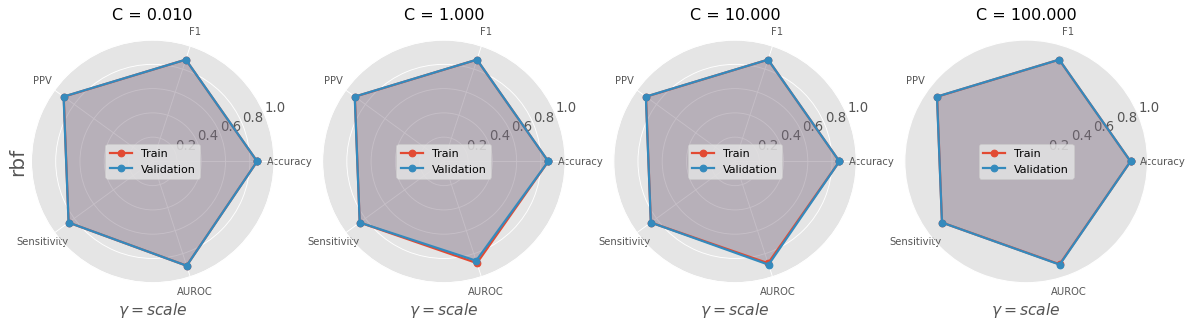

In [24]:
best_svm_non_lin_2feat = C_Support_Vector_Classification(X_train_2_feat, X_test_2_feat, y_train, y_test, n_splits=5,
                                                         Classifier='rbf')

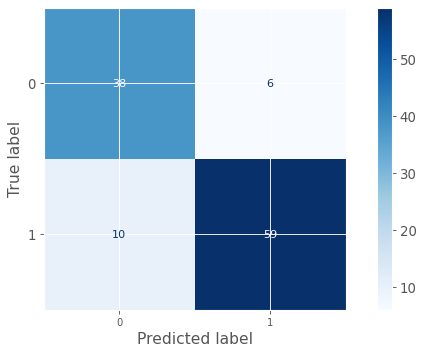

rfc :
Sensitivity is 0.86 
Specificity is 0.86 
PPV is 0.91 
NPV is 0.79 
Accuracy is 0.86 
F1 is 0.88 
AUROC is 0.894


In [25]:
rfc_2feat = Random_forest_classifier(X_train_2_feat, X_test_2_feat, y_train, y_test)

- e. What performs better? .

Q7.e solution:

As we can see, the 2 features of the reduced dimensionality are better then the 2 features that has the most weight. 

DOUBLE BAM!
